In [197]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import datetime
import random

import re
sns.set()

from scipy.stats.mstats import winsorize
import scipy.stats
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [199]:
train = pd.read_csv('Downloads_Hackathon19/train.csv')
test = pd.read_csv('Downloads_Hackathon19/test.csv')

In [200]:
train['random']=np.random.randint(1, 6, train.shape[0])
test['random']=np.random.randint(1, 6, test.shape[0])


In [201]:
for element in train.columns:
    if element in test.columns:
        s=1
        #print(element)
    else:
        print(element)
    

specific_death
months_survival


In [202]:
#Make it easier to split
train['train']=1
test['train']=0

## Join

In [203]:
df = train.append(test)

# Features

In [204]:
#Mean Encoding Function
def Target_encoding(df,element,target):
    #create aux    
    aux_df = pd.DataFrame(df.groupby(element)[target].mean())

    #change name
    new_variable=element+'_ENCODED'+target
    aux_df[new_variable] = aux_df[target]
    aux_df= aux_df.drop(target, axis=1)

    #join
    df = df.join(aux_df, how = 'left', on = element) 
    print(np.corrcoef(df[target], df[new_variable])[0][1])
    return df
def splited_target_encoding(df,query_train,query_test,element,target):
    entrenamiento=df.query(query_train)
    testeo=df.query(query_test)
    
    entrenamiento=Target_encoding(entrenamiento,element,target)
    
    inputZIP1=element
    inputZIP2=element+'_ENCODED'+target
    
    mydict=dict(zip(entrenamiento[inputZIP1],entrenamiento[inputZIP2]))
    testeo[element+'_ENCODED'+target]=testeo[element].map(mydict)
    return entrenamiento.append(testeo)



## Features categoricas binarias

In [205]:
df.cutaneous_biopsy_vascular_invasion.fillna('not_taken',inplace=True)

In [206]:
df['paso_previo_metastasis']= np.where(df['cutaneous_biopsy_vascular_invasion']=='present',1,0)

In [207]:
df.cutaneous_biopsy_ulceration.fillna('not_taken',inplace=True)

In [208]:
df.cutaneous_biopsy_satellitosis.fillna('not_taken',inplace=True)

In [209]:
df.cutaneous_biopsy_neurotropism.fillna('not_taken',inplace=True)

In [210]:
df.cutaneous_biopsy_lymphatic_invasion.fillna('not_taken',inplace=True)

In [211]:
df.cutaneous_biopsy_associated_nevus.fillna('not_taken',inplace=True)

In [212]:
# Did this person take the LAB test
df['LAB_taken_13']  =np.where(df['LAB1300'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2404']= np.where(df['LAB2404'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2405'] = np.where(df['LAB2405'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2406'] = np.where(df['LAB2406'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2407'] = np.where(df['LAB2407'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2419'] = np.where(df['LAB2419'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2422'] = np.where(df['LAB2422'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2467'] = np.where(df['LAB2467'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2469'] = np.where(df['LAB2469'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2476'] = np.where(df['LAB2476'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2498'] = np.where(df['LAB2498'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2544'] = np.where(df['LAB2544'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB2679'] = np.where(df['LAB2679'].fillna(9999)==9999,1,0)

df['LAB_taken_LAB4176'] = np.where(df['LAB2544'].fillna(9999)==9999,1,0)

df['LAB_taken_LABGF_filtrat_glomerular'] = np.where(df['LABGF_filtrat_glomerular'].fillna(99999)==99999,1,0)

## Risky fill na

In [213]:
df['MC1R'].fillna(df.MC1R.median(),inplace=True)

In [214]:
df['count_inv_prec_tumour'].fillna(df.count_inv_prec_tumour.median(),inplace=True)

In [215]:
df['count_situ_prec_tumour'].fillna(df.count_situ_prec_tumour.median(),inplace=True)

In [216]:
df['cutaneous_biopsy_histological_subtype'].fillna('superficial_spreading',inplace=True)

In [217]:
df['cutaneous_biopsy_mitotic_index'].fillna(df['cutaneous_biopsy_mitotic_index'].median(),inplace=True)

In [218]:
df['cutaneous_biopsy_predominant_cell_type'].fillna('epitheloid',inplace=True)

In [219]:
df['cutaneous_biopsy_regression'].fillna('missing',inplace=True)

In [220]:
df['patient_eye_color'].fillna('brown',inplace=True)

In [221]:
df['patient_gender'].fillna('female',inplace=True)

In [222]:
df['patient_eye_color'].fillna('notknown',inplace=True)

In [223]:
df['patient_hair_color'].fillna('notknown',inplace=True)

In [224]:
df['patient_phototype_unk']=df['patient_phototype'].fillna('notknown')

In [225]:
df['patient_phototype_common_2'] = df['patient_phototype'].fillna('2')

In [226]:
df['patient_phototype_common_3'] = df['patient_phototype'].fillna('3')

In [227]:
df['primary_tumour_location_coded'].fillna('trunk',inplace=True)

In [228]:
df['scenario'].fillna('notknown',inplace=True)

In [229]:
df['slnb_ldn_location_total'].fillna(df['slnb_ldn_location_total'].median(),inplace=True)

In [230]:
df['total_count_slnb_ldn'].fillna(df['total_count_slnb_ldn'].median(),inplace=True)

In [231]:
df['total_positives_slnb_ldn'].fillna(df['total_positives_slnb_ldn'].median(),inplace=True)

In [232]:
df['visceral_metastasis_location'].fillna('missing',inplace=True)

In [233]:
df['paso_previo_metastasis'].fillna(0,inplace=True)

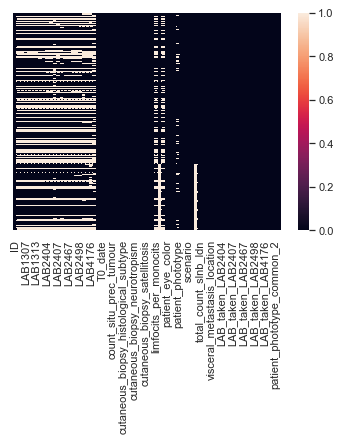

In [234]:
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

In [235]:
df.limfocits_per_monocits.fillna(df.limfocits_per_monocits.median(),inplace=True)

In [236]:
df.neutrofils_per_limfocits.fillna(df.neutrofils_per_limfocits.median(),inplace=True)

In [237]:
df.patient_phototype.fillna(df.patient_phototype.median(),inplace=True)

In [238]:
# Winsorization
df['LAB1301']=scipy.stats.mstats.winsorize(df['LAB1301'], limits=0.05,inplace=True)

df['LAB2405']=scipy.stats.mstats.winsorize(df['LAB1301'], limits=0.05,inplace=True)

df['LAB2406']=scipy.stats.mstats.winsorize(df['LAB2406'], limits=0.05,inplace=True)

df['LAB2419']=scipy.stats.mstats.winsorize(df['LAB2419'], limits=0.05,inplace=True)


df['LAB2422']=scipy.stats.mstats.winsorize(df['LAB2422'], limits=0.05,inplace=True)


df['LAB2476']=scipy.stats.mstats.winsorize(df['LAB2476'], limits=0.05,inplace=True)


df['cutaneous_biopsy_mitotic_index']=scipy.stats.mstats.winsorize(df['cutaneous_biopsy_mitotic_index'], limits=0.05,inplace=True)


df['limfocits_per_monocits']=scipy.stats.mstats.winsorize(df['limfocits_per_monocits'], limits=0.05,inplace=True)


df['LABGF_filtrat_glomerular']=scipy.stats.mstats.winsorize(df['LABGF_filtrat_glomerular'], limits=0.05,inplace=True)

df['LAB1316']=scipy.stats.mstats.winsorize(df['LAB1316'], limits=0.05,inplace=True)


In [239]:
# obtain the x variables that are categorical
categorical_feature_mask = df.dtypes==object

# Filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

for col in df.columns:
    if col not in categorical_cols:
        if col != 'specific_death' and col != 'months_survival':
            df[col] = df[col].fillna(df[col].mean())

In [240]:
df.shape

(3068, 74)

In [241]:
df.to_csv('bigger.csv')

In [242]:
df.head()

,ID,LAB1300,LAB1301,LAB1307,LAB1309,LAB1311,LAB1313,LAB1314,LAB1316,LAB2404,LAB2405,LAB2406,LAB2407,LAB2419,LAB2422,LAB2467,LAB2469,LAB2476,LAB2498,LAB2544,LAB2679,LAB4176,LABGF_filtrat_glomerular,MC1R,T0_date,age,count_inv_prec_tumour,count_situ_prec_tumour,cutaneous_biopsy_associated_nevus,cutaneous_biopsy_breslow,cutaneous_biopsy_histological_subtype,cutaneous_biopsy_lymphatic_invasion,cutaneous_biopsy_mitotic_index,cutaneous_biopsy_neurotropism,cutaneous_biopsy_predominant_cell_type,cutaneous_biopsy_regression,cutaneous_biopsy_satellitosis,cutaneous_biopsy_ulceration,cutaneous_biopsy_vascular_invasion,limfocits_per_monocits,months_survival,neutrofils_per_limfocits,patient_eye_color,patient_gender,patient_hair_color,patient_phototype,primary_tumour_location_coded,random,scenario,slnb_ldn_location_total,specific_death,total_count_slnb_ldn,total_positives_slnb_ldn,train,visceral_metastasis_location,paso_previo_metastasis,LAB_taken_13,LAB_taken_LAB2404,LAB_taken_LAB2405,LAB_taken_LAB2406,LAB_taken_LAB2407,LAB_taken_LAB2419,LAB_taken_LAB2422,LAB_taken_LAB2467,LAB_taken_LAB2469,LAB_taken_LAB2476,LAB_taken_LAB2498,LAB_taken_LAB2544,LAB_taken_LAB2679,LAB_taken_LAB4176,LAB_taken_LABGF_filtrat_glomerular,patient_phototype_unk,patient_phototype_common_2,patient_phototype_common_3
0,ID2,6.600000,260.000000,4.200000,1.840000,0.190000,0.280000,13.400000,0.020000,21.00000,260.000000,17.000000,0.400000,308.000000,95.00000,0.800000,320.000000,72.000000,65.000000,1.600000,0.120000,7.000000,76.692145,0.0,2004-03-02,64.251366,0.0,0.0,absent,0.90,superficial_spreading,absent,0.0,absent,epitheloid,extensive,absent,absent,absent,9.650000,179.0,2.282609,brown,female,brown,2.0,trunk,1,scenario2,1.0,0.0,1.0,0.0,1,missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
1,ID4,7.314448,252.010132,4.468256,2.110679,0.373566,0.172969,14.118785,0.038357,23.83014,252.010132,29.416104,0.708325,338.722488,102.14691,0.963757,207.917879,112.238666,72.643528,1.931261,0.102403,7.603459,82.481334,0.0,2006-09-13,44.613699,0.0,0.0,absent,3.75,superficial_spreading,not_taken,0.0,not_taken,epitheloid,partial,not_taken,present,not_taken,5.666667,127.0,2.120606,green,male,red,2.0,trunk,1,scenario3,1.0,0.0,16.0,2.0,1,missing,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2
2,ID6,9.640000,169.000000,6.500000,2.300000,0.500000,0.200000,13.400000,0.000000,22.00000,169.000000,12.000000,0.700000,477.000000,81.00000,0.760000,172.000000,53.000000,73.000000,1.800000,0.040000,6.200000,91.545283,0.0,2013-02-13,35.956164,0.0,0.0,absent,0.50,superficial_spreading,absent,0.0,absent,epitheloid,partial,absent,absent,absent,4.600000,67.0,2.826087,brown,female,brown,2.0,trunk,3,scenario1,1.0,0.0,3.0,0.0,1,missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
3,ID9,10.080000,280.000000,5.900000,2.900000,0.600000,0.400000,13.600000,0.000000,19.00000,280.000000,9.000000,0.400000,382.000000,90.00000,1.050000,193.000000,51.000000,71.000000,1.700000,0.080000,6.600000,64.014945,0.0,2009-10-06,33.347945,0.0,0.0,not_taken,0.50,spitzoid,absent,2.0,absent,epitheloid,absent,absent,absent,not_taken,4.833333,111.0,2.034483,blue,female,brown,3.0,lower limbs,4,scenario1,1.0,0.0,3.0,0.0,1,missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3
4,ID17,6.810000,283.000000,4.000000,2.000000,0.400000,0.200000,12.600000,0.000000,21.00000,283.000000,9.000000,1.000000,298.000000,100.00000,0.800000,208.000000,56.000000,71.000000,1.300000,0.090000,4.800000,88.316054,0.0,2009-03-23,32.060274,0.0,0.0,not_taken,0.60,superficial_spreading,absent,0.0,absent,epitheloid,partial,absent,absent,not_taken,5.000000,118.0,2.000000,brown,female,brown,2.0,lower limbs,3,scenario1,1.0,0.0,3.0,0.0,1,missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2


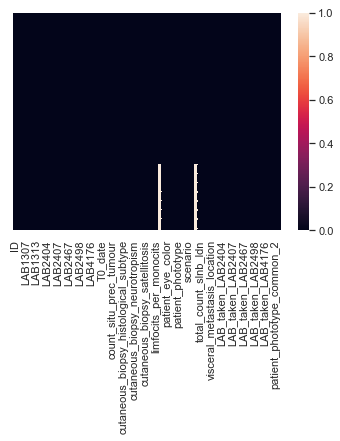

In [243]:
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

## Date

In [244]:
def date_to_month(x):
    year = int(x[:4])
    month = int(x[5:7])
    return 12 * (year - 1998) + month

df['T0_date'] = [date_to_month(v) for v in df['T0_date'].values]

## Mean Encodings

In [245]:
df.specific_death.unique()

array([ 0.,  1., nan])

In [246]:
targets=['specific_death','months_survival']

In [247]:
cats=['cutaneous_biopsy_associated_nevus',
 'cutaneous_biopsy_histological_subtype',
 'cutaneous_biopsy_lymphatic_invasion',
 'cutaneous_biopsy_neurotropism',
 'cutaneous_biopsy_predominant_cell_type',
 'cutaneous_biopsy_regression',
 'cutaneous_biopsy_satellitosis',
 'cutaneous_biopsy_ulceration',
 'cutaneous_biopsy_vascular_invasion',
 'patient_eye_color',
 'patient_gender',
 'patient_hair_color',
 'primary_tumour_location_coded',
 'scenario',
 'visceral_metastasis_location',
 'patient_phototype_unk',
 'patient_phototype_common_2',
 'patient_phototype_common_3']

In [248]:
for targ in targets:
    for columnas in cats:
        df=splited_target_encoding(df,'train==1','train==0',columnas,targ)
    

0.03713417871640304
0.3117536827506859
0.15695906986330568
0.12454004424877697
0.07784173935353905
0.1482049216735401
0.18867037458693886
0.333323283100396
0.1113749234830956
0.09472040744385524
0.09005669918856885
0.16423717211201327
0.15639452998757372
0.37361357461022765
0.24236341838766215
0.15895623129380582
0.15895623129380582
0.15895623129380582
0.20604245419169018
0.19829345794635558
0.11389256676125058
0.09242546033483291
0.11705566983815904
0.2420757440057372
0.11085390568575121
0.20053460216961613
0.07706235307068983
0.06651077106891432
0.08476801131532931
0.09011500033774983
0.14453046594230218
0.21573132001329542
0.14185367687940528
0.16522749372825282
0.16522749372825282
0.16522749372825282


## Hot Encoding

In [249]:
columns_encoding = [
    'cutaneous_biopsy_ulceration',
    'cutaneous_biopsy_satellitosis',
    'cutaneous_biopsy_vascular_invasion',
    'cutaneous_biopsy_neurotropism',
    'cutaneous_biopsy_lymphatic_invasion',
    'cutaneous_biopsy_associated_nevus',
    'MC1R']

for col in columns_encoding:
    variables = df[col].unique()
    for v in variables:
        df[col + str(v)] = [1 if row == v else 0 for row in df[col].values]

In [250]:
df.head()

,ID,LAB1300,LAB1301,LAB1307,LAB1309,LAB1311,LAB1313,LAB1314,LAB1316,LAB2404,LAB2405,LAB2406,LAB2407,LAB2419,LAB2422,LAB2467,LAB2469,LAB2476,LAB2498,LAB2544,LAB2679,LAB4176,LABGF_filtrat_glomerular,MC1R,T0_date,age,count_inv_prec_tumour,count_situ_prec_tumour,cutaneous_biopsy_associated_nevus,cutaneous_biopsy_breslow,cutaneous_biopsy_histological_subtype,cutaneous_biopsy_lymphatic_invasion,cutaneous_biopsy_mitotic_index,cutaneous_biopsy_neurotropism,cutaneous_biopsy_predominant_cell_type,cutaneous_biopsy_regression,cutaneous_biopsy_satellitosis,cutaneous_biopsy_ulceration,cutaneous_biopsy_vascular_invasion,limfocits_per_monocits,months_survival,neutrofils_per_limfocits,patient_eye_color,patient_gender,patient_hair_color,patient_phototype,primary_tumour_location_coded,random,scenario,slnb_ldn_location_total,specific_death,total_count_slnb_ldn,total_positives_slnb_ldn,train,visceral_metastasis_location,paso_previo_metastasis,LAB_taken_13,LAB_taken_LAB2404,LAB_taken_LAB2405,LAB_taken_LAB2406,LAB_taken_LAB2407,LAB_taken_LAB2419,LAB_taken_LAB2422,LAB_taken_LAB2467,LAB_taken_LAB2469,LAB_taken_LAB2476,LAB_taken_LAB2498,LAB_taken_LAB2544,LAB_taken_LAB2679,LAB_taken_LAB4176,LAB_taken_LABGF_filtrat_glomerular,patient_phototype_unk,patient_phototype_common_2,patient_phototype_common_3,cutaneous_biopsy_associated_nevus_ENCODEDspecific_death,cutaneous_biopsy_histological_subtype_ENCODEDspecific_death,cutaneous_biopsy_lymphatic_invasion_ENCODEDspecific_death,cutaneous_biopsy_neurotropism_ENCODEDspecific_death,cutaneous_biopsy_predominant_cell_type_ENCODEDspecific_death,cutaneous_biopsy_regression_ENCODEDspecific_death,cutaneous_biopsy_satellitosis_ENCODEDspecific_death,cutaneous_biopsy_ulceration_ENCODEDspecific_death,cutaneous_biopsy_vascular_invasion_ENCODEDspecific_death,patient_eye_color_ENCODEDspecific_death,patient_gender_ENCODEDspecific_death,patient_hair_color_ENCODEDspecific_death,primary_tumour_location_coded_ENCODEDspecific_death,scenario_ENCODEDspecific_death,visceral_metastasis_location_ENCODEDspecific_death,patient_phototype_unk_ENCODEDspecific_death,patient_phototype_common_2_ENCODEDspecific_death,patient_phototype_common_3_ENCODEDspecific_death,cutaneous_biopsy_associated_nevus_ENCODEDmonths_survival,cutaneous_biopsy_histological_subtype_ENCODEDmonths_survival,cutaneous_biopsy_lymphatic_invasion_ENCODEDmonths_survival,cutaneous_biopsy_neurotropism_ENCODEDmonths_survival,cutaneous_biopsy_predominant_cell_type_ENCODEDmonths_survival,cutaneous_biopsy_regression_ENCODEDmonths_survival,cutaneous_biopsy_satellitosis_ENCODEDmonths_survival,cutaneous_biopsy_ulceration_ENCODEDmonths_survival,cutaneous_biopsy_vascular_invasion_ENCODEDmonths_survival,patient_eye_color_ENCODEDmonths_survival,patient_gender_ENCODEDmonths_survival,patient_hair_color_ENCODEDmonths_survival,primary_tumour_location_coded_ENCODEDmonths_survival,scenario_ENCODEDmonths_survival,visceral_metastasis_location_ENCODEDmonths_survival,patient_phototype_unk_ENCODEDmonths_survival,patient_phototype_common_2_ENCODEDmonths_survival,patient_phototype_common_3_ENCODEDmonths_survival,cutaneous_biopsy_ulcerationabsent,cutaneous_biopsy_ulcerationpresent,cutaneous_biopsy_ulcerationnot_taken,cutaneous_biopsy_satellitosisabsent,cutaneous_biopsy_satellitosisnot_taken,cutaneous_biopsy_satellitosispresent,cutaneous_biopsy_vascular_invasionabsent,cutaneous_biopsy_vascular_invasionnot_taken,cutaneous_biopsy_vascular_invasionpresent,cutaneous_biopsy_neurotropismabsent,cutaneous_biopsy_neurotropismnot_taken,cutaneous_biopsy_neurotropismpresent,cutaneous_biopsy_lymphatic_invasionabsent,cutaneous_biopsy_lymphatic_invasionnot_taken,cutaneous_biopsy_lymphatic_invasionpresent,cutaneous_biopsy_associated_nevusabsent,cutaneous_biopsy_associated_nevusnot_taken,cutaneous_biopsy_associated_nevuspresent,MC1R0.0,MC1R1.0
0,ID2,6.600000,260.000000,4.200000,1.840000,0.190000,0.280000,13.400000,0.020000,21.00000,260.000000,17.000000,0.400000,308.000000,95.00000,0.800000,320.000000,72.000000,65.000000,1

In [251]:
def bined_splited_target_encoding(df,query_train,query_test,element,target,bin_num):
    element_bin = element+'_bin'
    df[element_bin] = pd.cut(df[element],bin_num,labels=np.array(range(0,bin_num)))
    return splited_target_encoding(df,query_train,query_test,element_bin,target)

In [252]:
df = bined_splited_target_encoding(df,'train==1','train==0','cutaneous_biopsy_breslow','specific_death',30);

0.41825758003022473


In [253]:
df['cutaneous_biopsy_breslow_w']=scipy.stats.mstats.winsorize(df['cutaneous_biopsy_breslow'], limits=0.05,inplace=True)


In [254]:
df.describe()

,LAB1300,LAB1301,LAB1307,LAB1309,LAB1311,LAB1313,LAB1314,LAB1316,LAB2404,LAB2405,LAB2406,LAB2407,LAB2419,LAB2422,LAB2467,LAB2469,LAB2476,LAB2498,LAB2544,LAB2679,LAB4176,LABGF_filtrat_glomerular,MC1R,T0_date,age,count_inv_prec_tumour,count_situ_prec_tumour,cutaneous_biopsy_breslow,cutaneous_biopsy_mitotic_index,limfocits_per_monocits,months_survival,neutrofils_per_limfocits,patient_phototype,random,slnb_ldn_location_total,specific_death,total_count_slnb_ldn,total_positives_slnb_ldn,train,paso_previo_metastasis,LAB_taken_13,LAB_taken_LAB2404,LAB_taken_LAB2405,LAB_taken_LAB2406,LAB_taken_LAB2407,LAB_taken_LAB2419,LAB_taken_LAB2422,LAB_taken_LAB2467,LAB_taken_LAB2469,LAB_taken_LAB2476,LAB_taken_LAB2498,LAB_taken_LAB2544,LAB_taken_LAB2679,LAB_taken_LAB4176,LAB_taken_LABGF_filtrat_glomerular,cutaneous_biopsy_associated_nevus_ENCODEDspecific_death,cutaneous_biopsy_histological_subtype_ENCODEDspecific_death,cutaneous_biopsy_lymphatic_invasion_ENCODEDspecific_death,cutaneous_biopsy_neurotropism_ENCODEDspecific_death,cutaneous_biopsy_predominant_cell_type_ENCODEDspecific_death,cutaneous_biopsy_regression_ENCODEDspecific_death,cutaneous_biopsy_satellitosis_ENCODEDspecific_death,cutaneous_biopsy_ulceration_ENCODEDspecific_death,cutaneous_biopsy_vascular_invasion_ENCODEDspecific_death,patient_eye_color_ENCODEDspecific_death,patient_gender_ENCODEDspecific_death,patient_hair_color_ENCODEDspecific_death,primary_tumour_location_coded_ENCODEDspecific_death,scenario_ENCODEDspecific_death,visceral_metastasis_location_ENCODEDspecific_death,patient_phototype_unk_ENCODEDspecific_death,patient_phototype_common_2_ENCODEDspecific_death,patient_phototype_common_3_ENCODEDspecific_death,cutaneous_biopsy_associated_nevus_ENCODEDmonths_survival,cutaneous_biopsy_histological_subtype_ENCODEDmonths_survival,cutaneous_biopsy_lymphatic_invasion_ENCODEDmonths_survival,cutaneous_biopsy_neurotropism_ENCODEDmonths_survival,cutaneous_biopsy_predominant_cell_type_ENCODEDmonths_survival,cutaneous_biopsy_regression_ENCODEDmonths_survival,cutaneous_biopsy_satellitosis_ENCODEDmonths_survival,cutaneous_biopsy_ulceration_ENCODEDmonths_survival,cutaneous_biopsy_vascular_invasion_ENCODEDmonths_survival,patient_eye_color_ENCODEDmonths_survival,patient_gender_ENCODEDmonths_survival,patient_hair_color_ENCODEDmonths_survival,primary_tumour_location_coded_ENCODEDmonths_survival,scenario_ENCODEDmonths_survival,visceral_metastasis_location_ENCODEDmonths_survival,patient_phototype_unk_ENCODEDmonths_survival,patient_phototype_common_2_ENCODEDmonths_survival,patient_phototype_common_3_ENCODEDmonths_survival,cutaneous_biopsy_ulcerationabsent,cutaneous_biopsy_ulcerationpresent,cutaneous_biopsy_ulcerationnot_taken,cutaneous_biopsy_satellitosisabsent,cutaneous_biopsy_satellitosisnot_taken,cutaneous_biopsy_satellitosispresent,cutaneous_biopsy_vascular_invasionabsent,cutaneous_biopsy_vascular_invasionnot_taken,cutaneous_biopsy_vascular_invasionpresent,cutaneous_biopsy_neurotropismabsent,cutaneous_biopsy_neurotropismnot_taken,cutaneous_biopsy_neurotropismpresent,cutaneous_biopsy_lymphatic_invasionabsent,cutaneous_biopsy_lymphatic_invasionnot_taken,cutaneous_biopsy_lymphatic_invasionpresent,cutaneous_biopsy_associated_nevusabsent,cutaneous_biopsy_associated_nevusnot_taken,cutaneous_biopsy_associated_nevuspresent,MC1R0.0,MC1R1.0,cutaneous_biopsy_breslow_bin_ENCODEDspecific_death,cutaneous_biopsy_breslow_w
count,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,2148.000000,3068.000000,3068.000000,3068.000000,3068.000000,2148.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.0

## More Features

In [255]:
 df = bined_splited_target_encoding(df,'train==1','train==0','T0_date','specific_death',50);

0.1719628974436349


In [256]:
df = bined_splited_target_encoding(df,'train==1','train==0','LAB1300','specific_death',5);

0.06763531557639553


In [257]:
df = bined_splited_target_encoding(df,'train==1','train==0','age','specific_death',10);

0.12632181980185456


In [258]:
df = bined_splited_target_encoding(df,'train==1','train==0','LAB1314','specific_death',30);

0.11910128759773285


In [259]:
df['cutaneous_biopsy_breslow_w_2'] = df['cutaneous_biopsy_breslow_w']

In [260]:
df['cutaneous_biopsy_breslow_w_log'] = np.log(df['cutaneous_biopsy_breslow_w'])

In [261]:
for targ in targets:
    df=splited_target_encoding(df,'train==1','train==0','total_positives_slnb_ldn',targ)

0.35687036033291986
0.21342192574977503


In [262]:
df.to_csv('numeric_full.csv')

# Machine Learning

In [263]:
train_orig=df.query('train==1')
train_orig=train_orig._get_numeric_data()

In [264]:
train.shape

(2148, 55)

In [265]:
target=train_orig['specific_death']
target_2=train_orig['months_survival']
train_orig.drop(columns=['specific_death','months_survival'],inplace=True)


In [266]:
from sklearn.model_selection import train_test_split

In [267]:
train, test, y_train, y_test = train_test_split(train_orig, target, stratify = target, test_size = 0.2)

## Catboost

In [268]:
train.columns

Index(['LAB1300', 'LAB1301', 'LAB1307', 'LAB1309', 'LAB1311', 'LAB1313', 'LAB1314', 'LAB1316', 'LAB2404', 'LAB2405',
       ...
       'cutaneous_biopsy_breslow_bin_ENCODEDspecific_death', 'cutaneous_biopsy_breslow_w', 'T0_date_bin_ENCODEDspecific_death', 'LAB1300_bin_ENCODEDspecific_death', 'age_bin_ENCODEDspecific_death', 'LAB1314_bin_ENCODEDspecific_death', 'cutaneous_biopsy_breslow_w_2', 'cutaneous_biopsy_breslow_w_log', 'total_positives_slnb_ldn_ENCODEDspecific_death', 'total_positives_slnb_ldn_ENCODEDmonths_survival'], dtype='object', length=119)

In [269]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [270]:
from catboost import CatBoostClassifier


# Initialize CatBoostClassifier
cb = CatBoostClassifier()

#Parameters
params = {#'depth': [3,4, 7],
          #'learning_rate' : [0.001,0.03, 0.1],
          'l2_leaf_reg': [4],
         'depth': [3],
          'learning_rate' : [0.01],
         #'l2_leaf_reg': [1],
         'iterations': [200]}



In [271]:
tic=time.time()
# GridSearchCV
catb_model = GridSearchCV(cb, params, scoring="f1", cv=3, refit=True, n_jobs=-1)
catb_model.fit(train,y_train)


# Get predicted classes
preds_class = catb_model.predict(test)

print('The time elapsed is {}s'.format(np.abs(tic-time.time())))

0:	learn: 0.6846249	total: 70ms	remaining: 13.9s
1:	learn: 0.6760507	total: 119ms	remaining: 11.8s
2:	learn: 0.6691422	total: 165ms	remaining: 10.8s
3:	learn: 0.6618030	total: 203ms	remaining: 9.93s
4:	learn: 0.6536990	total: 249ms	remaining: 9.71s
5:	learn: 0.6474692	total: 286ms	remaining: 9.24s
6:	learn: 0.6405178	total: 314ms	remaining: 8.66s
7:	learn: 0.6348281	total: 344ms	remaining: 8.26s
8:	learn: 0.6282533	total: 367ms	remaining: 7.78s
9:	learn: 0.6218590	total: 393ms	remaining: 7.46s
10:	learn: 0.6156587	total: 414ms	remaining: 7.11s
11:	learn: 0.6097090	total: 434ms	remaining: 6.79s
12:	learn: 0.6043407	total: 462ms	remaining: 6.64s
13:	learn: 0.5988901	total: 483ms	remaining: 6.42s
14:	learn: 0.5927144	total: 514ms	remaining: 6.34s
15:	learn: 0.5878103	total: 533ms	remaining: 6.13s
16:	learn: 0.5827632	total: 556ms	remaining: 5.98s
17:	learn: 0.5781697	total: 573ms	remaining: 5.79s
18:	learn: 0.5727202	total: 583ms	remaining: 5.55s
19:	learn: 0.5687684	total: 594ms	remainin

172:	learn: 0.3539345	total: 3.01s	remaining: 470ms
173:	learn: 0.3536728	total: 3.04s	remaining: 454ms
174:	learn: 0.3534099	total: 3.05s	remaining: 436ms
175:	learn: 0.3530756	total: 3.08s	remaining: 420ms
176:	learn: 0.3528417	total: 3.09s	remaining: 402ms
177:	learn: 0.3524117	total: 3.11s	remaining: 384ms
178:	learn: 0.3520739	total: 3.13s	remaining: 367ms
179:	learn: 0.3518157	total: 3.15s	remaining: 349ms
180:	learn: 0.3514867	total: 3.16s	remaining: 332ms
181:	learn: 0.3511920	total: 3.19s	remaining: 315ms
182:	learn: 0.3510160	total: 3.21s	remaining: 299ms
183:	learn: 0.3508542	total: 3.24s	remaining: 281ms
184:	learn: 0.3507178	total: 3.26s	remaining: 264ms
185:	learn: 0.3505365	total: 3.29s	remaining: 248ms
186:	learn: 0.3503391	total: 3.32s	remaining: 231ms
187:	learn: 0.3498079	total: 3.35s	remaining: 214ms
188:	learn: 0.3496167	total: 3.38s	remaining: 197ms
189:	learn: 0.3493050	total: 3.4s	remaining: 179ms
190:	learn: 0.3489697	total: 3.43s	remaining: 162ms
191:	learn: 0

In [272]:
# Train
f1_score(catb_model.predict(train),y_train)

0.3485254691689008

In [273]:
# Test
f1_score(catb_model.predict(test),y_test)

0.2765957446808511

In [274]:
catb_model.best_params_

{'depth': 3, 'iterations': 200, 'l2_leaf_reg': 4, 'learning_rate': 0.01}

In [275]:
catb_model.cv_results_

{'mean_fit_time': array([14.9257973]),
 'std_fit_time': array([0.03800865]),
 'mean_score_time': array([0.02377097]),
 'std_score_time': array([0.00167328]),
 'param_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_iterations': masked_array(data=[200],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_l2_leaf_reg': masked_array(data=[4],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'depth': 3,
   'iterations': 200,
   'l2_leaf_reg': 4,
   'learning_rate': 0.01}],
 'split0_test_score': array([0.25954198]),
 'split1_test_score': array([0.25862069]),
 'split2_test_score': array([0.30894309]),
 'mean_test_score': array([0.27568257]),
 'std_test_score': array([0.02350122]),
 'rank_test_score': array([1], dtype

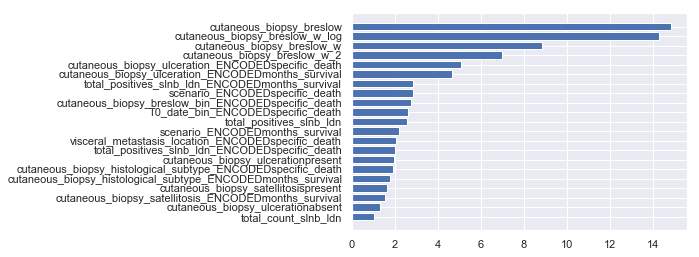

In [276]:
importances_dict = {train.columns[i] : (catb_model.best_estimator_.feature_importances_)[i] for i in range(len(train.columns))}

importances_dict_filtered = {k : v for k, v in importances_dict.items() if v > 1}

importances_dict_filtered = dict(sorted(importances_dict_filtered.items(),  key=lambda kv: abs(kv[1])))

plt.barh(range(len(importances_dict_filtered)), list(importances_dict_filtered.values()))
plt.yticks(range(len(importances_dict_filtered)), list(importances_dict_filtered.keys()))

plt.show()

## XGB regressor

In [277]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from math import sqrt


import xgboost as xgb

In [278]:
#Fitting XGB regressor 
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
model.fit(train,y_train)
print (model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)


In [279]:
rms = sqrt(mean_squared_error(y_test, model.predict(test)))
rms

0.3778188041426868

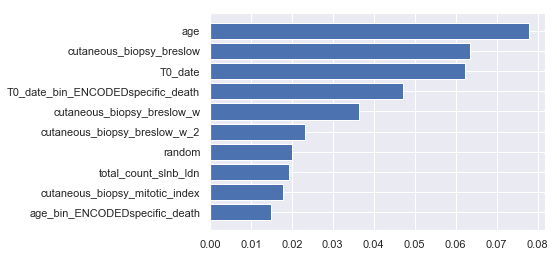

In [280]:
importances_dict = {train.columns[i] : (model.feature_importances_)[i] for i in range(len(train.columns))}

importances_dict_filtered = {k : v for k, v in importances_dict.items() if v > 0.015}

importances_dict_filtered = dict(sorted(importances_dict_filtered.items(),  key=lambda kv: abs(kv[1])))

plt.barh(range(len(importances_dict_filtered)), list(importances_dict_filtered.values()))
plt.yticks(range(len(importances_dict_filtered)), list(importances_dict_filtered.keys()))

plt.show()